In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
names = ['x','y']
df = pd.read_csv("/home/emirhan/Desktop/tez/wisdm-dataset/wisdm-dataset/raw/phone/accel/data_1635_accel_phone.txt", names=['Subject_id', 'Activity_label', 'Time_stamp','x', 'y', 'z'])

In [3]:
df.head()

,Subject_id,Activity_label,Time_stamp,x,y,z
0,1635,A,676163861324906,-2.405701,-7.531982,1.126068
1,1635,A,676163881466507,-4.159500,-10.449677,0.558929
2,1635,A,676163901608109,-5.177933,-10.687866,0.279022
3,1635,A,676163921749711,-6.348404,-10.366272,0.676483
4,1635,A,676163941891312,-3.594833,-6.853378,2.384781


In [4]:
df.Activity_label.unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'O', 'P', 'Q', 'R', 'S'], dtype=object)

In [5]:
df['x']=((df['x']-df['x'].min())/(df['x'].max()-df['x'].min()))  
df['y']=((df['y']-df['y'].min())/(df['y'].max()-df['y'].min()))   
df['z']=((df['z']-df['z'].min())/(df['z'].max()-df['z'].min()))  

In [6]:
df.head()

,Subject_id,Activity_label,Time_stamp,x,y,z
0,1635,A,676163861324906,0.444713,0.303963,0.535369
1,1635,A,676163881466507,0.399743,0.229149,0.520827
2,1635,A,676163901608109,0.373629,0.223042,0.513650
3,1635,A,676163921749711,0.343617,0.231288,0.523841
4,1635,A,676163941891312,0.414222,0.321363,0.567644


In [7]:
df.to_csv("/home/emirhan/Desktop/tez/wisdm-dataset/wisdm-dataset/raw/phone/accel/data_1604_accel_s_phone.txt", index=False)

In [8]:
new_df=pd.read_csv("/home/emirhan/Desktop/tez/wisdm-dataset/wisdm-dataset/raw/phone/accel/data_1604_accel_s_phone.txt")

In [9]:
new_df.head()

,Subject_id,Activity_label,Time_stamp,x,y,z
0,1635,A,676163861324906,0.444713,0.303963,0.535369
1,1635,A,676163881466507,0.399743,0.229149,0.520827
2,1635,A,676163901608109,0.373629,0.223042,0.513650
3,1635,A,676163921749711,0.343617,0.231288,0.523841
4,1635,A,676163941891312,0.414222,0.321363,0.567644


In [10]:
new_df.corr()

,Subject_id,Time_stamp,x,y,z
Subject_id,NaN,NaN,NaN,NaN,NaN
Time_stamp,NaN,1.000000,-0.182065,0.310777,0.125953
x,NaN,-0.182065,1.000000,-0.259724,-0.461589
y,NaN,0.310777,-0.259724,1.000000,0.145043
z,NaN,0.125953,-0.461589,0.145043,1.000000


In [11]:
new_df.max()

Subject_id                   1635
Activity_label                  S
Time_stamp        680278073812298
x                               1
y                               1
z                               1
dtype: object

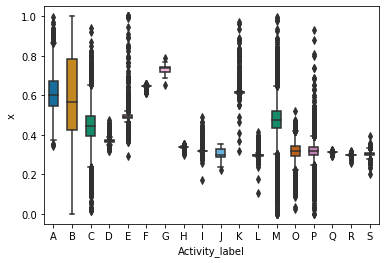

In [12]:
bplot = sns.boxplot(y='x', x='Activity_label', 
                 data=df, 
                 width=0.5,
                 palette="colorblind")    

In [13]:
new_df.isnull().sum()

Subject_id        0
Activity_label    0
Time_stamp        0
x                 0
y                 0
z                 0
dtype: int64

In [14]:
low=0.01
high=0.99
new_df.quantile([low,high])

,Subject_id,Time_stamp,x,y,z
0.01,1635.0,6.761898e+14,0.250338,0.000000,0.239245
0.99,1635.0,6.802132e+14,0.931874,0.653003,0.818415


In [15]:
qdf=new_df.quantile([low,high])

In [16]:
new_df.isnull().sum()

Subject_id        0
Activity_label    0
Time_stamp        0
x                 0
y                 0
z                 0
dtype: int64

In [17]:
qdf.x

0.01    0.250338
0.99    0.931874
Name: x, dtype: float64

In [18]:
new_df.x=new_df.x.apply(lambda v: v if qdf.x[low]< v < qdf.x[high] else np.nan)

In [19]:
new_df.y=new_df.y.apply(lambda v: v if qdf.y[low]< v < qdf.y[high] else np.nan)

In [20]:
new_df.z=new_df.z.apply(lambda v: v if qdf.z[low]< v < qdf.z[high] else np.nan)

In [21]:
new_df.isnull().sum()

Subject_id           0
Activity_label       0
Time_stamp           0
x                 2578
y                 3416
z                 2578
dtype: int64

In [22]:
new_df.dropna(inplace=True)

In [23]:
new_df.describe()

,Subject_id,Time_stamp,x,y,z
count,122442.0,1.224420e+05,122442.000000,122442.000000,122442.000000
mean,1635.0,6.779759e+14,0.427280,0.380133,0.533055
std,0.0,1.091368e+12,0.137724,0.114940,0.123832
min,1635.0,6.761639e+14,0.250343,0.000086,0.239247
25%,1635.0,6.769824e+14,0.316088,0.301458,0.450286
50%,1635.0,6.779991e+14,0.365240,0.385705,0.527584
75%,1635.0,6.787176e+14,0.512882,0.468905,0.641523
max,1635.0,6.802781e+14,0.931826,0.653002,0.818370


In [24]:
new_df.head()

,Subject_id,Activity_label,Time_stamp,x,y,z
0,1635,A,676163861324906,0.444713,0.303963,0.535369
1,1635,A,676163881466507,0.399743,0.229149,0.520827
2,1635,A,676163901608109,0.373629,0.223042,0.513650
3,1635,A,676163921749711,0.343617,0.231288,0.523841
4,1635,A,676163941891312,0.414222,0.321363,0.567644


In [25]:
new_df.x.unique()

array([0.44471323, 0.39974333, 0.37362927, ..., 0.29295052, 0.30037266,
       0.29813429])

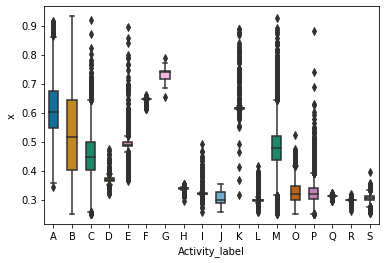

In [26]:
bplot = sns.boxplot(y='x', x='Activity_label', 
                 data=new_df, 
                 width=0.5,
                 palette="colorblind")    

In [27]:
"""new_df = pd.DataFrame(new_df, columns=['x', 'y', 'z'])
sns.kdeplot(new_df['x'],shade=True, label='Accelemater x',color="red");
sns.kdeplot(new_df['y'],shade=True, label='Accelemater y',color="blue");
sns.kdeplot(new_df['z'],shade=True, label='Accelemater z',color="black");
plt.title('Phone Accelemator Distribution Graph')
plt.xlabel('Accelemator Values')
plt.ylabel('') """ 


'new_df = pd.DataFrame(new_df, columns=[\'x\', \'y\', \'z\'])\nsns.kdeplot(new_df[\'x\'],shade=True, label=\'Accelemater x\',color="red");\nsns.kdeplot(new_df[\'y\'],shade=True, label=\'Accelemater y\',color="blue");\nsns.kdeplot(new_df[\'z\'],shade=True, label=\'Accelemater z\',color="black");\nplt.title(\'Phone Accelemator Distribution Graph\')\nplt.xlabel(\'Accelemator Values\')\nplt.ylabel(\'\') '

In [28]:
new_df.isnull().sum()

Subject_id        0
Activity_label    0
Time_stamp        0
x                 0
y                 0
z                 0
dtype: int64

In [29]:
#print("# numbers of original data:"+str(len(new_df.index)))

In [30]:
#new_df.info()

In [31]:
#new_df.isnull()

In [32]:
#new_df.isnull().sum()

In [33]:
#new_df.head()

In [34]:
new_df.drop("Subject_id" , axis=1 , inplace=True)
new_df.drop("Time_stamp" , axis=1 , inplace=True)

In [35]:
new_df.head()

,Activity_label,x,y,z
0,A,0.444713,0.303963,0.535369
1,A,0.399743,0.229149,0.520827
2,A,0.373629,0.223042,0.513650
3,A,0.343617,0.231288,0.523841
4,A,0.414222,0.321363,0.567644


In [36]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122442 entries, 0 to 128851
Data columns (total 4 columns):
Activity_label    122442 non-null object
x                 122442 non-null float64
y                 122442 non-null float64
z                 122442 non-null float64
dtypes: float64(3), object(1)
memory usage: 9.7+ MB


In [37]:
X = np.array(new_df.drop(['Activity_label'],axis=1))
Y = np.array(new_df['Activity_label'])

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=0,test_size=0.2)

In [39]:
from sklearn import svm

In [40]:
classifier = svm.SVC(kernel = 'linear', C = 1).fit(X_train, Y_train)
svm_predictions = classifier.predict(X_test) 
accuracy = classifier.score(X_test, Y_test) 

In [41]:
print(accuracy)

0.7273469721099269


In [42]:
accuracy_percantage=100*accuracy
accuracy_percantage

72.73469721099269

In [43]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(Y_test,y_pred))

[[1283   44   64    0  197    0   73    0    0    0    5    0   54    0
     1    0    0    0]
 [ 172  343   40   55   35    0  131   43   10    4   26   19   97   32
    29    4   14    3]
 [ 192  168  618    0  226    0    0    5    0    0    2    1  172  133
    49    2    0    0]
 [   0    0    0 1705    0    0    0    0    0    0    0    1    0    0
     0    0    0    0]
 [  25    7   23    2 1783    0    0    0    0    0    0    0    4    1
     0    0    0    0]
 [ 721    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0  711    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0 1740    0    0    0    0    0    0
     0    0    2    0]
 [   0    4    0    1    0    0    0    5 1743    0    0   26    0    0
     0    0    1    0]
 [   0    0    0    0    0    0    0    0    0  326    0    0    0    0
   198  170    1    0]
 [   1    1    0    0    0    0   11    0    0    